In [70]:
from fl_puf.FederatedDataset.PartitionTypes.representative import Representative
from fl_puf.FederatedDataset.PartitionTypes.balanced_and_unbalanced import BalancedAndUnbalanced
from fl_puf.FederatedDataset.PartitionTypes.unbalanced_partition import UnbalancedPartition
import torch
from fl_puf.FederatedDataset.Utils.utils import PartitionUtils
from DPL.Utils.dataset_utils import DatasetUtils
from fl_puf.Utils.utils import Utils
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [71]:
def plot_cdf(disparities_celeba, disparities_dutch, disparities_income, file_name):
    plt.figure(figsize=(13, 7))


    # Create kernel density estimate plots for both datasets with CDF
    sns.kdeplot(
        disparities_celeba,
        fill=False,
        cumulative=True,
        label="Celeba",
        linestyle="dashdot",
        linewidth=3,
        color="black",
    )
    sns.kdeplot(disparities_dutch, 
        fill=False, 
        cumulative=True, 
        label="Dutch", 
        linewidth=3, 
        color="red")
    sns.kdeplot(
        disparities_income,
        fill=False,
        cumulative=True,
        label="Income",
        linestyle="dotted",
        linewidth=3,
        color="blue",
    )
    plt.rcParams.update({"font.size": 30})
 
    # Add labels and title
    plt.xlabel("Disparities")
    plt.ylabel("Cumulative Probability")
    plt.title("Training Dataset Disparities",
        fontsize=38)

    # Show the legend
    plt.legend(ncol=1, fontsize="22")
    plt.savefig(f"./plots_paper/cdf_{file_name}.png", bbox_inches='tight')

    # Show the plot
    plt.show()

# Celeba

In [72]:
celeba_df = pd.read_csv("./data/celeba/original_merged.csv")
celeba_df.shape

(202599, 43)

In [73]:
labels = celeba_df["Smiling"].values
gender = celeba_df["Male"].values
combinations = [(label, gen) for label, gen in zip(labels, gender)]
combinations_with_index = [
    (label, gen, index) for index, (label, gen) in enumerate(zip(labels, gender))
]
counter_combinations = Counter(combinations)
counter_combinations

Counter({(1, -1): 63871, (-1, 1): 50636, (-1, -1): 54294, (1, 1): 33798})

In [74]:
train_set, test_set = DatasetUtils.download_dataset(
    "celeba",
    train_csv="original_merged",
    debug=True,
    base_path="./data/celeba",
)

In [75]:
train_path = Utils.prepare_dataset_for_FL(
    dataset=train_set,
    dataset_name="celeba",
    base_path="./data",
)

Generating unified dataset
Data Correctly downloaded


In [76]:
images, sensitive_attribute, labels = torch.load(train_path)
mapping = {-1: 0, 1: 1}
sensitive_attribute = torch.tensor([mapping[item] for item in sensitive_attribute])

idx = torch.tensor(list(range(len(images))))
dataset = [idx, sensitive_attribute, labels]
pool_size = 150
group_to_reduce = (1, 1)
group_to_increment = (0, 1)

Mean of disparity 0.37877759771258357 - std 0.16341544945242584
[0.24757085020242914, 0.23454020057793645, 0.1927861171873771, 0.20616870225370454, 0.17749134256644067, 0.19758765778401122, 0.2730696022044019, 0.2675789237985784, 0.203776942851493, 0.2398998603123923, 0.2311186695515054, 0.2374081578354925, 0.27363590005099436, 0.21357307930781805, 0.23279892745792755, 0.2125215926610988, 0.19033947501261989, 0.19184189168834265, 0.24690765681436525, 0.20291550657429094, 0.19808116348929428, 0.2515604402585645, 0.20531932225480615, 0.21256913021618903, 0.18535762483130902, 0.3140379448487222, 0.254320987654321, 0.23821179670236275, 0.22368225397994643, 0.17550229424314706, 0.21757005694504702, 0.25244531368763057, 0.13299663299663295, 0.1486721099746804, 0.1935382022446388, 0.20308641975308642, 0.2062899846755883, 0.20824534942182, 0.18922994275121563, 0.21312136139722346, 0.22004764225001355, 0.24779191204102713, 0.23337595907928388, 0.22193548972298316, 0.18589511754068716, 0.2163438

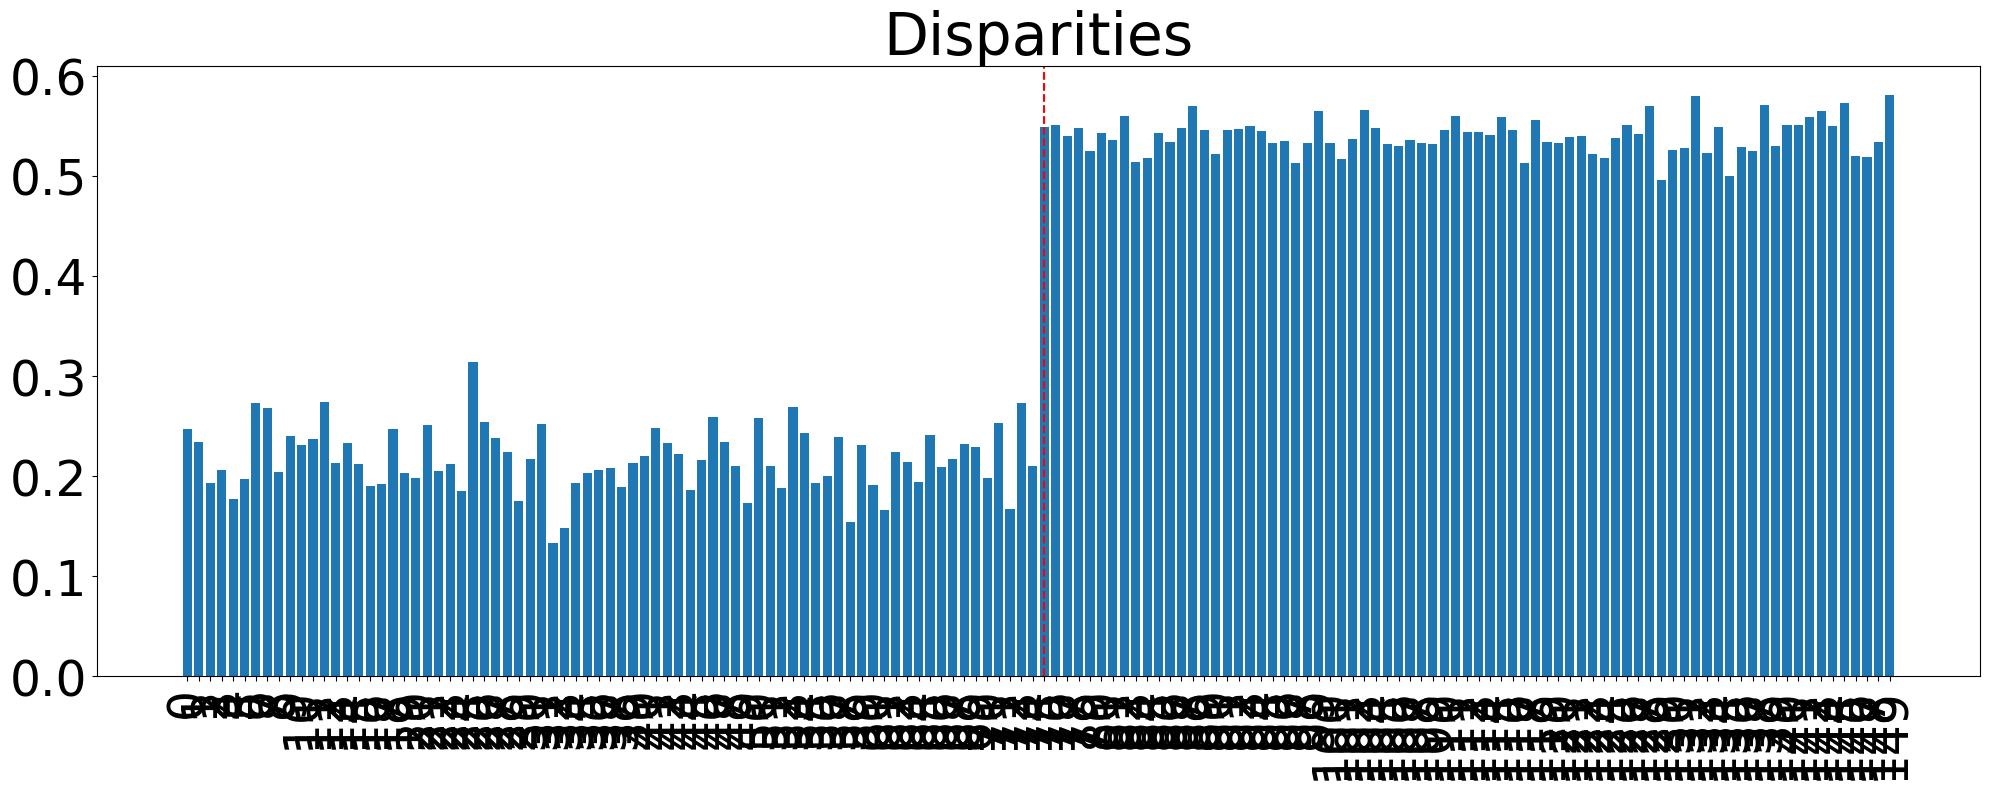

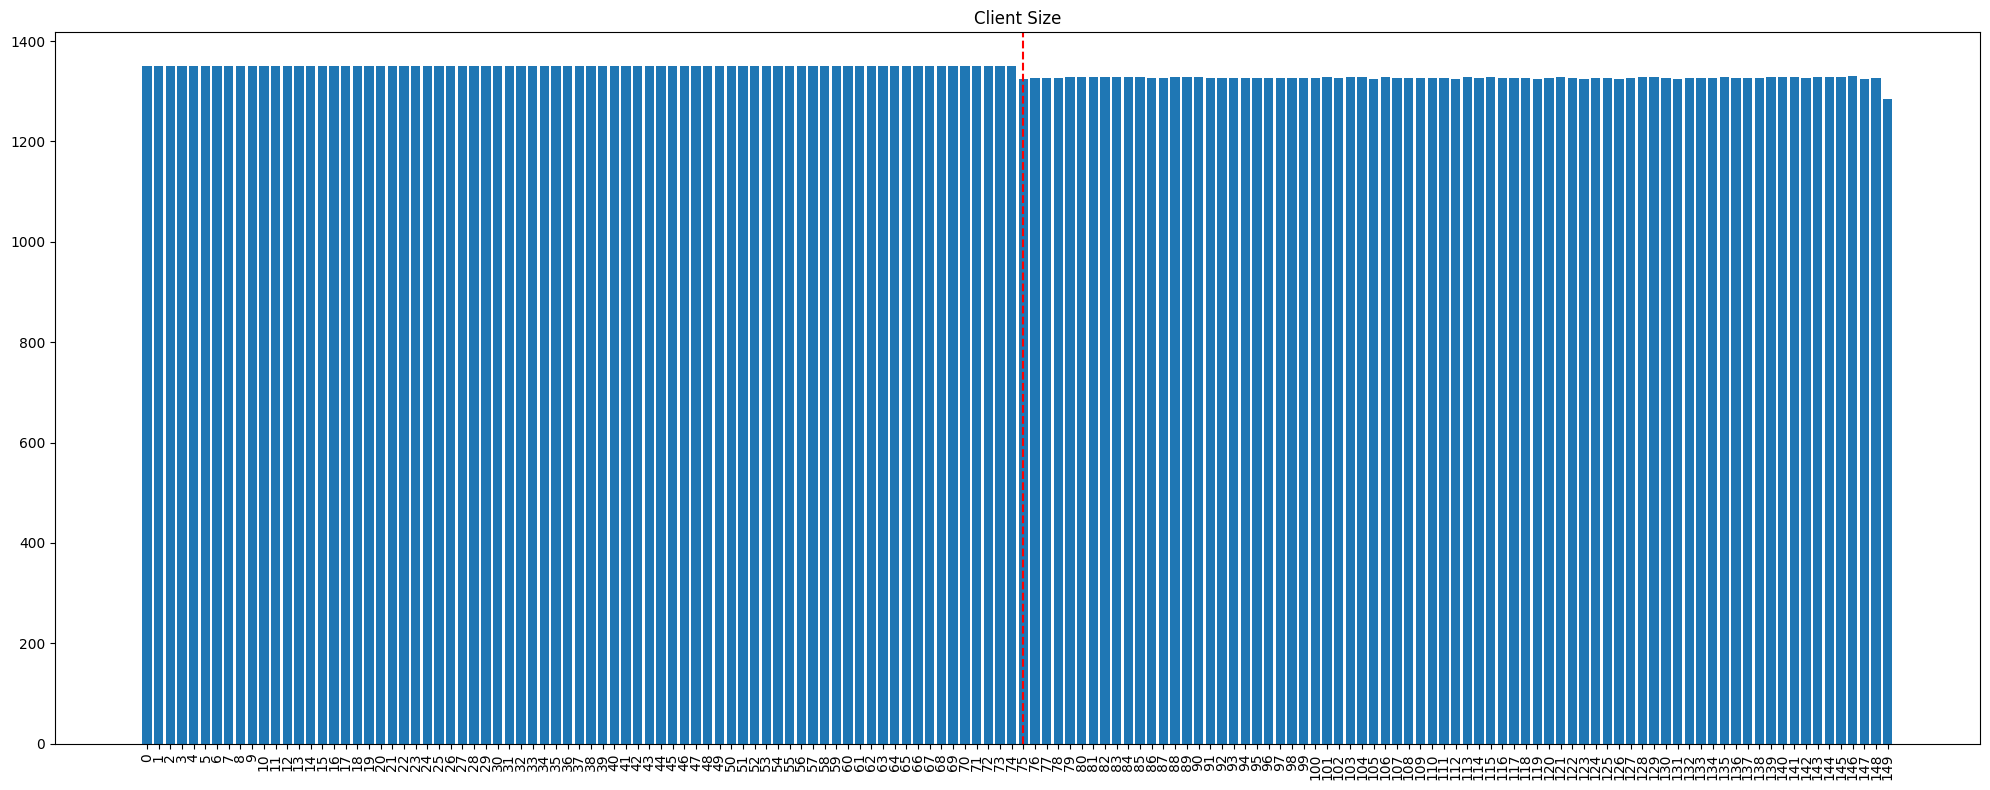

In [77]:
number_of_samples_per_node = 1350
ratio_unfair_nodes = 0.50
ratio_unfairness = (0.9, 0.9)

partitions_index_list, metadata = Representative.do_partitioning(
    labels=labels,
    sensitive_features=sensitive_attribute,
    num_partitions=pool_size,
    total_num_classes=2,
    group_to_reduce=group_to_reduce,
    group_to_increment=group_to_increment,
    number_of_samples_per_node=number_of_samples_per_node,
    ratio_unfair_nodes=ratio_unfair_nodes,
    ratio_unfairness=ratio_unfairness,
    one_group_nodes=True,
)
partitions = PartitionUtils.create_splitted_dataset_from_tuple(
    splitted_indexes=partitions_index_list,
    dataset=dataset,
)

# Dutch 

In [78]:
from fl_puf.FederatedDataset.PartitionTypes.representative import Representative
from fl_puf.FederatedDataset.PartitionTypes.balanced_and_unbalanced import (
    BalancedAndUnbalanced,
)

import torch
from fl_puf.FederatedDataset.Utils.utils import PartitionUtils
from DPL.Utils.dataset_utils import DatasetUtils
from fl_puf.Utils.utils import Utils
import pandas as pd
import matplotlib.pyplot as plt
from fl_puf.Utils.tabular_data_loader import prepare_tabular_data
from collections import Counter
import torch

Using ['sex_binary'] as sensitive feature(s).
['age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'Marital_status', 'sex_binary']
Index(['age', 'household_position', 'household_size', 'prev_residence_place',
       'citizenship', 'country_birth', 'edu_level', 'economic_status',
       'cur_eco_activity', 'Marital_status', 'sex_binary',
       'occupation_binary'],
      dtype='object')
Using ['sex_binary'] as sensitive feature(s).
Data shapes: x=(60420, 10), y=(60420,), z=(60420,)
Mean of disparity 0.4418116821370875 - std 0.21339514232867815
[0.5496688741721855, 0.015476190476190421, 0.6809815950920245, 0.07340823970037458, 0.6123595505617978, 0.08152322404371581, 0.6488095238095238, 0.12457500339997285, 0.6502732240437158, 0.05314075487123582, 0.6329113924050633, 0.10053884455357753, 0.5822784810126582, 0.04165816500034003, 0.6234567901234568, 0.0911472509526402, 0.6440677966101694

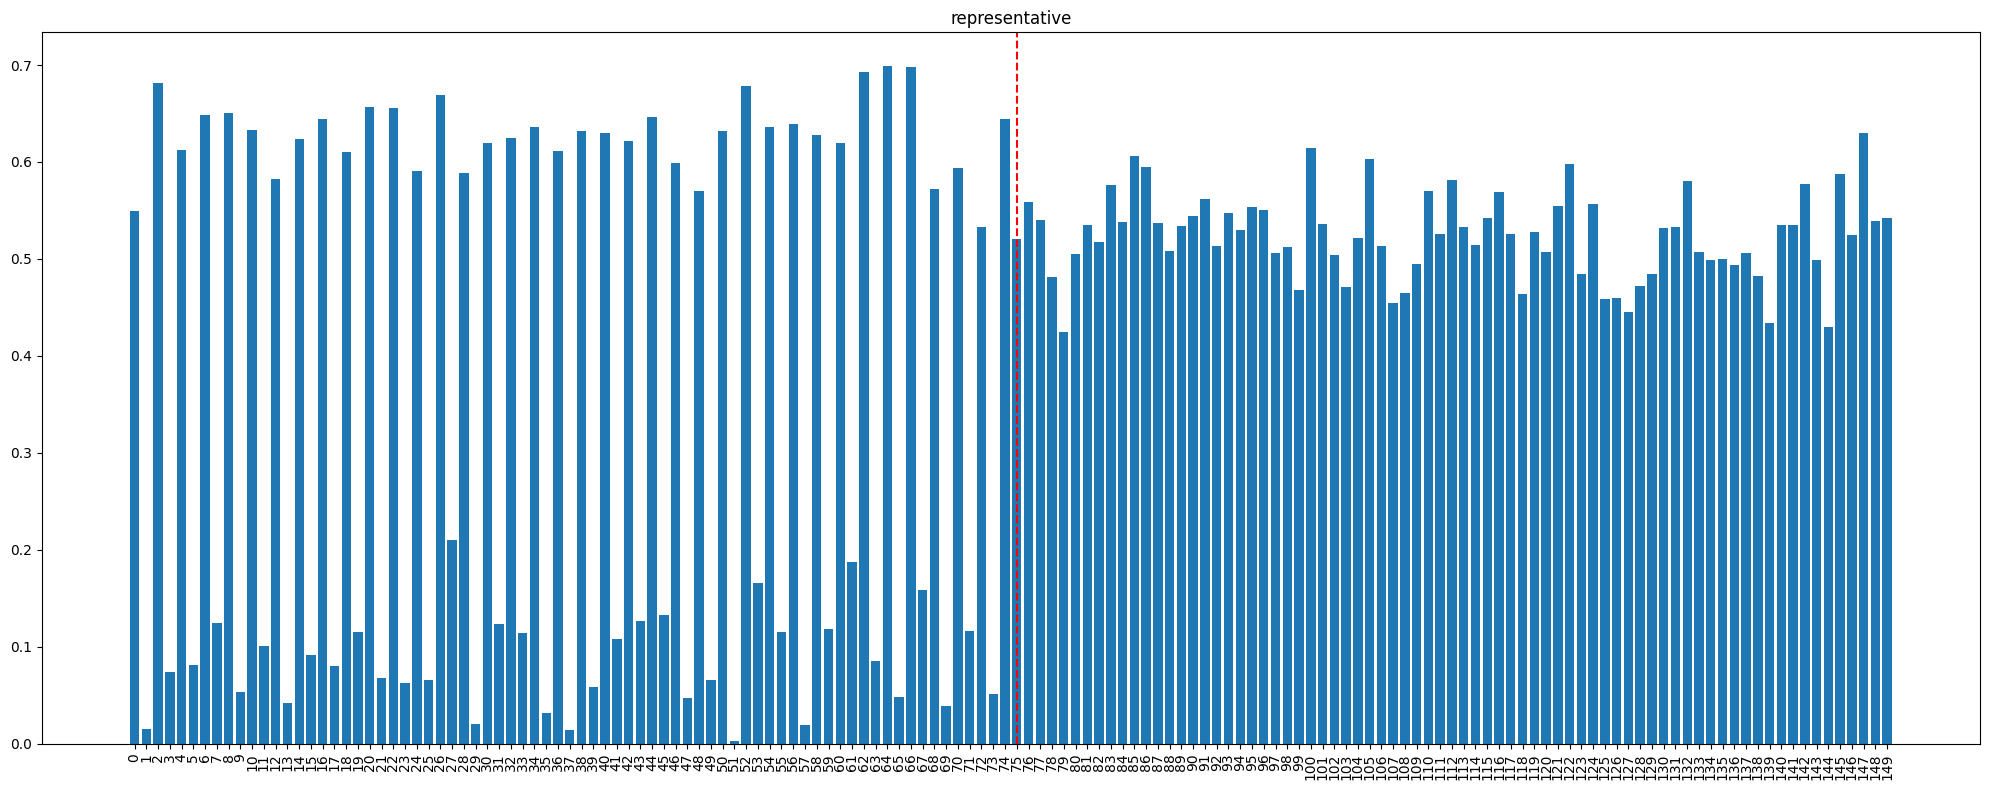

In [79]:
train_set, test_set = DatasetUtils.download_dataset(
    "dutch",
    train_csv="dutch_census",
    debug=True,
    base_path="./data/Tabular/dutch/",
)

fed_dir, _ = prepare_tabular_data(
    dataset_path="./data/Tabular/dutch/",
    dataset_name="dutch",
    groups_balance_factor=None,
    priv_balance_factor=None,
    do_iid_split=True,
    approach="representative",
    num_nodes=150,
    ratio_unfair_nodes=0.5,
    opposite_direction=False,
    ratio_unfairness=(0.6, 0.8),
    group_to_reduce=(0, 1),
    group_to_increment=(1, 1),
    number_of_samples_per_node=343,
    opposite_group_to_reduce=None,
    opposite_group_to_increment=None,
    opposite_ratio_unfairness=None,
    one_group_nodes=True
)

# Income

# Plot

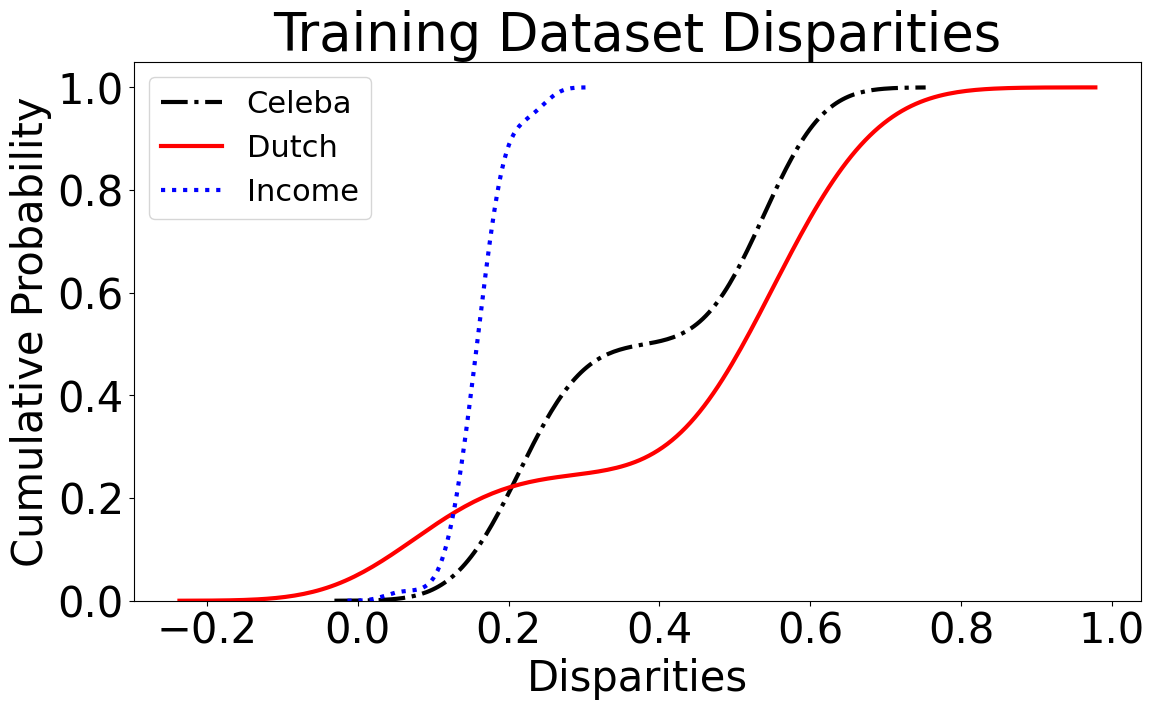

In [81]:
disparities_celeba = [0.19006429883649723, 0.19071078293219096, 0.21506115777013698, 0.1994953116876132, 0.21175464320625612, 0.23669004207573635, 0.23279311031149855, 0.2619013927914452, 0.22448832126018387, 0.2031906677682388, 0.16511355717170273, 0.22515886241690627, 0.23404159132007235, 0.26031177810738926, 0.18786109590707295, 0.2097875226039783, 0.21688291684033126, 0.26012978502648487, 0.21004399409176822, 0.16510825241936042, 0.22594425845673557, 0.20812025070719398, 0.2110663098530838, 0.24135802469135803, 0.17874303028129873, 0.2055229716520039, 0.21273699173156624, 0.2534159070728304, 0.21696413394526604, 0.21868510715509765, 0.1658995478036176, 0.20511622054038506, 0.19905983271413108, 0.22311512944400375, 0.19100615375569074, 0.1631820499745028, 0.21116885929294568, 0.17244763879873987, 0.16019179304192682, 0.20582877959927137, 0.18495532109418278, 0.19253483985569617, 0.25516129689541117, 0.2221005899166819, 0.2238103106411104, 0.2596418903258182, 0.2070172757833426, 0.22879220333471828, 0.25582541422042404, 0.21715142750013394, 0.2489988532318838, 0.2027042465541689, 0.20750377890555755, 0.22203606843194945, 0.1985780938565673, 0.2661722997994833, 0.2624993197032092, 0.2021156330749354, 0.18384293256996034, 0.22245593920750384, 0.2592432437327513, 0.23137755850510405, 0.18933169723410181, 0.2672562202127467, 0.25839153267283854, 0.18209764918625682, 0.23594372287519025, 0.21824232645128167, 0.2148148148148148, 0.2528545344443703, 0.18864524902260754, 0.21969572154978434, 0.1502097638811697, 0.16904025874238338, 0.1748617395676219, 0.5606641123882503, 0.5623376623376624, 0.5614906832298137, 0.5525, 0.5410872313527181, 0.5595984943538268, 0.5051413881748072, 0.5319693094629157, 0.5396419437340154, 0.5303030303030303, 0.5382685069008784, 0.5512010113780026, 0.5253164556962026, 0.5265822784810126, 0.5708812260536398, 0.5297766749379653, 0.5088832487309645, 0.5314861460957179, 0.5583756345177665, 0.5261194029850746, 0.525609756097561, 0.5595854922279793, 0.5415584415584416, 0.5221799746514575, 0.5325670498084292, 0.5415617128463477, 0.4963325183374083, 0.5311750599520384, 0.5437908496732027, 0.5248691099476439, 0.5622593068035944, 0.5515873015873016, 0.5417690417690417, 0.5485122897800776, 0.5305867665418227, 0.5335018963337548, 0.5286935286935287, 0.5196335078534031, 0.5511288180610889, 0.5459183673469388, 0.5703324808184143, 0.5120405576679341, 0.5468354430379747, 0.5267857142857143, 0.5136897001303782, 0.571964956195244, 0.5424757281553398, 0.5491480996068152, 0.5261096605744126, 0.5264483627204031, 0.5255754475703325, 0.533249686323714, 0.5320754716981132, 0.535031847133758, 0.5181476846057572, 0.5244667503136763, 0.5462392108508014, 0.5580774365821095, 0.5215736040609137, 0.5443037974683544, 0.5468164794007491, 0.5160098522167488, 0.5232704402515723, 0.5271122320302648, 0.5403645833333333, 0.5483870967741935, 0.5624227441285538, 0.5528255528255528, 0.55, 0.5245901639344263, 0.5485122897800776, 0.5532194480946124, 0.5400254129606099, 0.5339425587467364, 0.5210918114143921]
disparities_dutch = [0.6149425287356322, 0.023872950819672223, 0.5886075949367089, 0.08851934979255938, 0.5604395604395604, 0.012752499489900093, 0.5389221556886228, 0.046759164796300046, 0.7111111111111111, 0.14020948105828746, 0.6851851851851852, 0.04355866036572831, 0.5722543352601156, 0.18429650806616293, 0.6384180790960452, 0.09165475461166694, 0.6264367816091954, 0.07154088050314467, 0.6318681318681318, 0.12452380952380948, 0.6374269005847953, 0.14250221223878556, 0.5846994535519126, 0.13120277721053697, 0.6787878787878788, 0.08145854833161326, 0.6264367816091954, 0.12397143828629709, 0.6590909090909091, 0.04984349482852479, 0.7396449704142012, 0.06383051078011281, 0.6823529411764706, 0.010511227902532339, 0.6333333333333333, 0.024128045867176318, 0.6071428571428571, 0.008333333333333304, 0.532967032967033, 0.09092145528731721, 0.588957055214724, 0.07082027524185852, 0.643312101910828, 0.08041450777202075, 0.6011560693641619, 0.09304223627831054, 0.650887573964497, 0.0883573761567773, 0.65, 0.18009929946269465, 0.650887573964497, 0.10623084780388159, 0.6387096774193548, 0.04495569188820725, 0.5705882352941176, 0.07687060909897003, 0.5423728813559322, 0.13796157514647778, 0.6503067484662577, 0.014047619047618976, 0.6477272727272727, 0.04523809523809519, 0.6045197740112994, 0.21222630218958255, 0.591715976331361, 0.12566299469604247, 0.6829268292682927, 0.002050861361772016, 0.6797752808988764, 0.013602666122560003, 0.5533333333333333, 0.09307624294361694, 0.625, 0.01443001443001446, 0.6524390243902439, 0.45854604860118436, 0.6139512661251791, 0.5542672560353621, 0.4005167958656331, 0.5083612040133779, 0.5462937729935959, 0.5395238095238095, 0.48754339391464163, 0.4880656732891832, 0.4498906207273722, 0.5058159425248033, 0.5352459016393443, 0.5457142857142858, 0.5399576155318567, 0.6295199182839633, 0.4558522959531271, 0.5296220633299284, 0.4597366597366597, 0.545284715975922, 0.5487645847632121, 0.5841664966333401, 0.510054533060668, 0.4855294518215867, 0.4888911676237353, 0.566394279877426, 0.5597137014314928, 0.5096796182685753, 0.547908874532472, 0.5445517430312992, 0.505210475798711, 0.46769366795892, 0.5354317165462676, 0.5473612529792304, 0.5403319050533905, 0.6390476190476191, 0.5107412491420728, 0.5106151333696244, 0.5293376897420189, 0.5594484167517875, 0.4595866584816861, 0.5214504596527069, 0.5344077247382021, 0.5581141844938002, 0.45744462674323216, 0.510674578814542, 0.46309523809523806, 0.5408504538939322, 0.48350901054063244, 0.5155514630652752, 0.44547619047619047, 0.5969047619047618, 0.44128246974024204, 0.48496189439303206, 0.5608535838268327, 0.5702453987730062, 0.550251597987216, 0.598327213382293, 0.4719073777901398, 0.5581936366746494, 0.5729315628192033, 0.517683465959328, 0.5317622253961776, 0.575870985302123, 0.5641705774331769, 0.5304164398475776, 0.49356749030018376, 0.5519188894937398, 0.5379824382274861, 0.5245946314211746, 0.47810268616116963, 0.5168279057092247, 0.570390832821772, 0.4784603794260667, 0.47196038251366124, 0.4489289357361442]
disparities_income = [0.1859159590783911,
 0.1362820699032743,
 0.13091847350040065,
 0.14822017074913818,
 0.11032625560101583,
 0.15713553427747484,
 0.1562540466561631,
 0.13256928152904657,
 0.1345607842458707,
 0.1387186432945975,
 0.13248082512120984,
 0.18917247360166,
 0.169701017885188,
 0.1862126869181816,
 0.17712099425054306,
 0.18267818886641218,
 0.14816830857855123,
 0.21611225679548463,
 0.13278441433811927,
 0.12219864065643055,
 0.14471139504573327,
 0.169595496362552,
 0.17102802746690604,
 0.16435057737808778,
 0.1538649141622529,
 0.17177041107077484,
 0.1773511911261334,
 0.12689710873117432,
 0.17939542886582904,
 0.15162205047173521,
 0.1219558619825849,
 0.1173696716926661,
 0.14781711501124295,
 0.24917157000676937,
 0.1632904228220463,
 0.18198363237558457,
 0.14440473434193102,
 0.1623013725460123,
 0.14520543008653342,
 0.15498097811032963,
 0.18939297121835197,
 0.15473849180518418,
 0.1587090630185951,
 0.25727127031581054,
 0.10464242718995653,
 0.16036830694315463,
 0.1811591164769264,
 0.17993426662922507,
 0.1716182436354593,
 0.23979546071664226,
 0.03619751491115153]
plot_cdf(disparities_celeba, disparities_dutch,disparities_income, "distributions")